In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
df = pd.read_csv('/content/breat_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Initial exploration

In [ ]:
# Basic structure
print(df.shape)

(569, 33)


In [ ]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
# diagnosis distribution
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
# Check for missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Summary of all features
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

# This helps identify which features differ significantly between classes.

In [ ]:
# Class-wise mean comparison
print(df.groupby('diagnosis').mean())

                     id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
B          2.654382e+07    12.146524     17.914762       78.075406   
M          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
B          462.790196         0.092478          0.080085        0.046058   
M          978.376415         0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  ...  texture_worst  \
diagnosis                                      ...                  
B                     0.025717       0.174186  ...      23.515070   
M                     0.087990       0.192909  ...      29.318208   

           perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
diagnosis                                                

# Visual exploratory data analysis

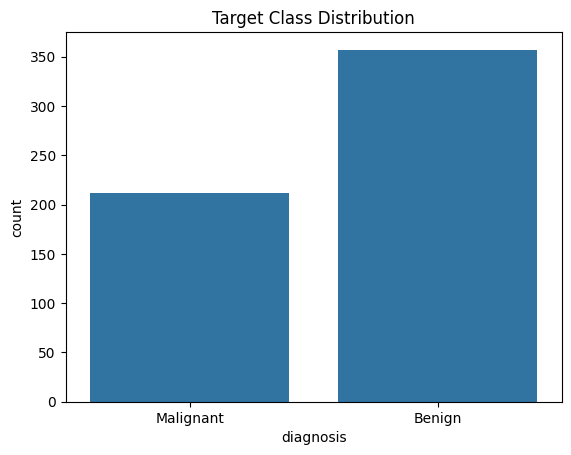

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title('Target Class Distribution')
plt.show()

# Correlation Heatmap(exclude non numerical column)
Helps identify multicollinearity or highly predictive features.

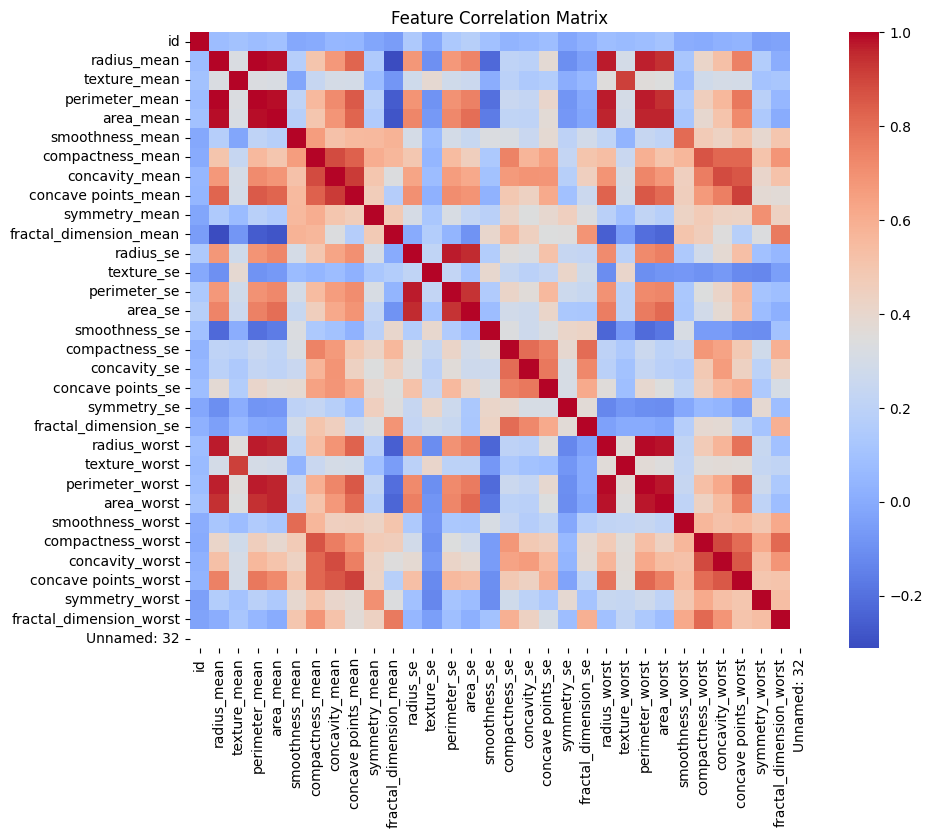

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

# Boxplots or Violin plots for Top Features

Top correlated features: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean']


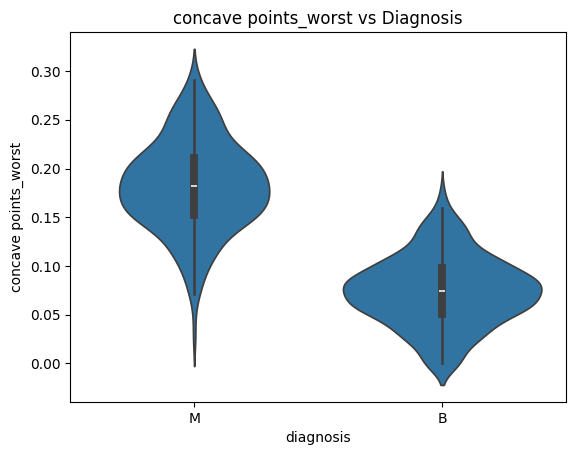

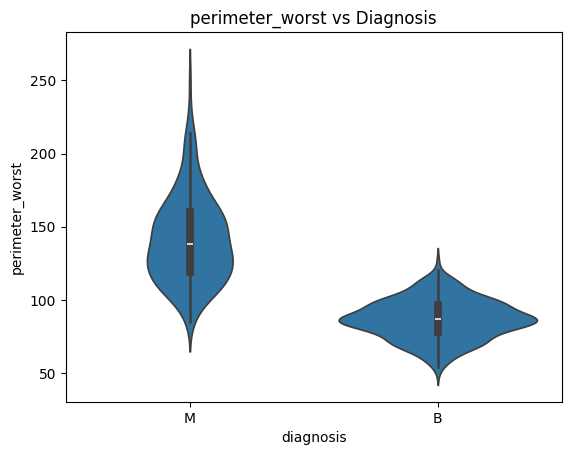

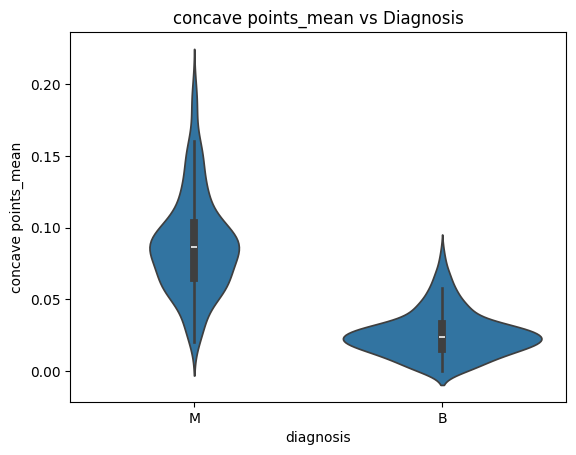

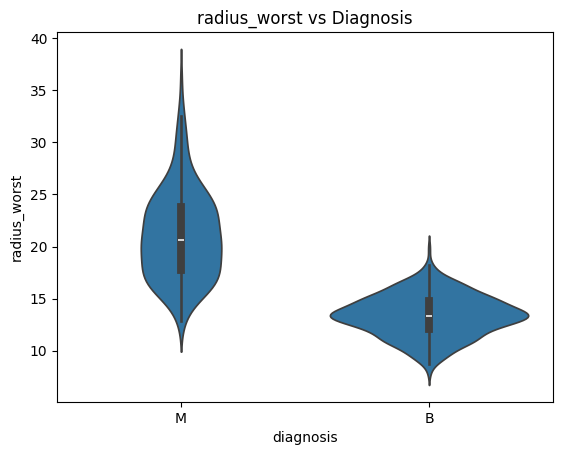

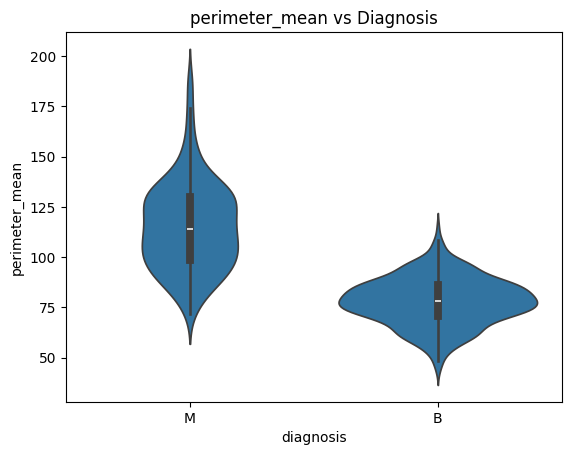

In [ ]:
# Create a copy and add a numeric version of diagnosis
df_temp = df.copy()
df_temp['diagnosis_numeric'] = df_temp['diagnosis'].map({'M': 0, 'B': 1})

# Select only numeric columns for correlation
numeric_df = df_temp.select_dtypes(include=['float64', 'int64'])

# Now compute correlation with numeric diagnosis
top_features = numeric_df.corr()['diagnosis_numeric'].abs().sort_values(ascending=False)[1:6].index
print("Top correlated features:", list(top_features))

for feature in top_features:
    sns.violinplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} vs Diagnosis')
    plt.show()


# Pycaret setup

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# drop 'unnamed' column

df.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
from pycaret.classification import *

clf = setup(data=df, target='diagnosis', session_id=123)

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 32)"
6,Transformed train set shape,"(398, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,31
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9648,0.9940,0.9648,0.9660,0.9646,0.9241,0.9257,0.2140
et,Extra Trees Classifier,0.9647,0.9967,0.9647,0.9667,0.9646,0.9242,0.9263,0.1830
lda,Linear Discriminant Analysis,0.9599,0.9923,0.9599,0.9635,0.9589,0.9112,0.9165,0.0410
lightgbm,Light Gradient Boosting Machine,0.9598,0.9922,0.9598,0.9610,0.9596,0.9132,0.9149,1.1380
rf,Random Forest Classifier,0.9572,0.9935,0.9572,0.9609,0.9573,0.9094,0.9128,0.2490
gbc,Gradient Boosting Classifier,0.9547,0.9929,0.9547,0.9574,0.9547,0.9031,0.9059,0.5510
qda,Quadratic Discriminant Analysis,0.9546,0.9961,0.9546,0.9565,0.9546,0.9029,0.9047,0.0420
ridge,Ridge Classifier,0.9497,0.9938,0.9497,0.9533,0.9487,0.8890,0.8944,0.0410
xgboost,Extreme Gradient Boosting,0.9496,0.9937,0.9496,0.9523,0.9497,0.8927,0.8951,0.1300
lr,Logistic Regression,0.9347,0.9670,0.9347,0.9408,0.9339,0.8580,0.8656,1.1180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,1.0000,0.9750,0.9766,0.9751,0.9474,0.9487
1,0.9500,0.9840,0.9500,0.9537,0.9492,0.8904,0.8958
2,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
3,0.9500,1.0000,0.9500,0.9537,0.9492,0.8904,0.8958
4,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9500,0.9973,0.9500,0.9500,0.9500,0.8933,0.8933
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8974,0.9857,0.8974,0.9048,0.8987,0.7839,0.7885


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

# plot most important features

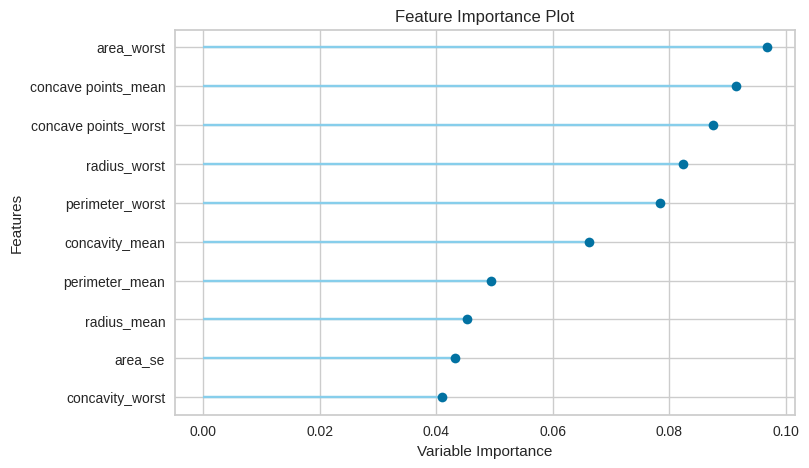

In [ ]:
plot_model(best, plot='feature')

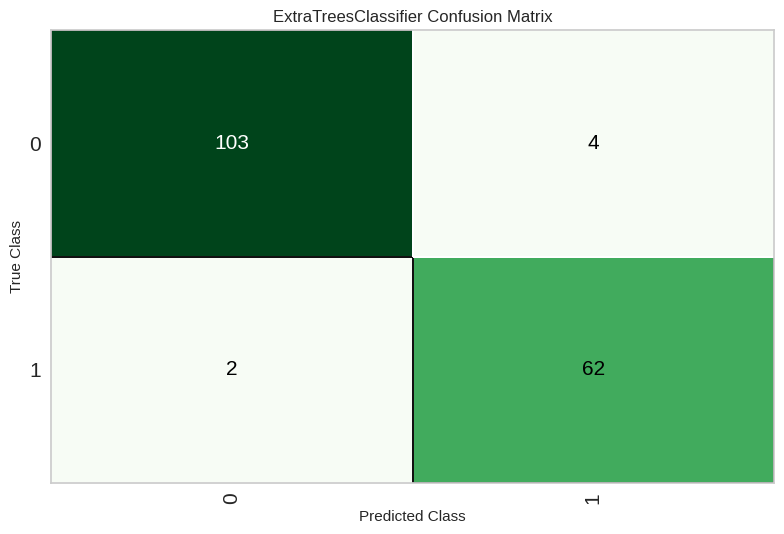

In [ ]:
plot_model(best, plot='confusion_matrix')

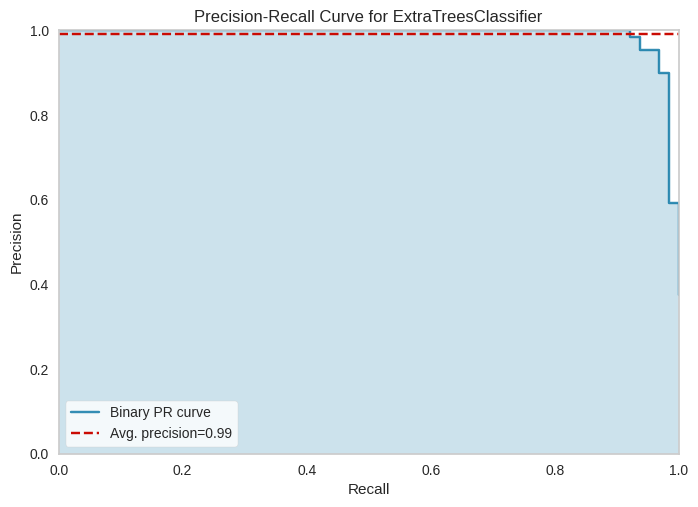

In [ ]:
#precision recall graph

plot_model(best, plot='pr')

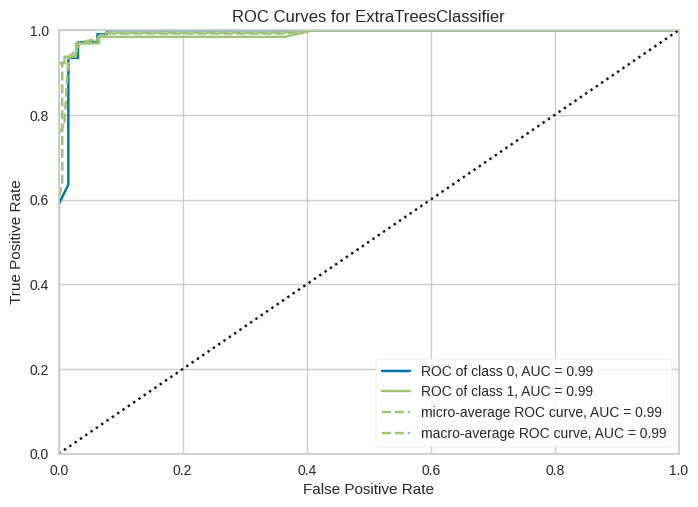

In [ ]:
#roc curve

plot_model(best, plot='auc')

In [ ]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9649,0.9919,0.9649,0.9654,0.9650,0.9256,0.9258


In [ ]:
holdout_pred.head(20)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
115,864685,11.930000,21.530001,76.529999,438.600006,0.09768,0.07849,0.03328,0.020080,0.1688,...,583.000000,0.15000,0.23990,0.15030,0.07247,0.2438,0.08541,B,B,0.96
21,8510824,9.504000,12.440000,60.340000,273.899994,0.10240,0.06492,0.02956,0.020760,0.1815,...,314.899994,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B,B,1.00
382,90250,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.07943,0.029780,0.1203,...,488.399994,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,B,B,0.96
136,868223,11.710000,16.670000,74.720001,423.600006,0.10510,0.06095,0.03592,0.026000,0.1339,...,546.700012,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343,B,B,1.00
2,84300903,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.127900,0.2069,...,1709.000000,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,M,M,1.00
241,883539,12.420000,15.040000,78.610001,476.500000,0.07926,0.03393,0.01053,0.011080,0.1546,...,543.400024,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,B,B,1.00
219,88119002,19.530001,32.470001,128.000000,1223.000000,0.08420,0.11300,0.11450,0.066370,0.1428,...,2477.000000,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568,M,M,0.99
435,908489,13.980000,19.620001,91.120003,599.500000,0.10600,0.11330,0.11260,0.064630,0.1669,...,869.299988,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,M,M,0.86
454,911202,12.620000,17.150000,80.620003,492.899994,0.08583,0.05430,0.02966,0.022720,0.1799,...,633.500000,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330,B,B,0.99
329,895633,16.260000,21.879999,107.500000,826.799988,0.11650,0.12830,0.17990,0.079810,0.1869,...,975.200012,0.14260,0.21160,0.33440,0.10470,0.2736,0.07953,M,M,0.85


In [ ]:
new_data = df.copy()
new_data.drop('diagnosis', axis = 1 , inplace = True)

In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction_label,prediction_score
0,842302,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1.00
1,842517,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1.00
2,84300903,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1.00
3,84348301,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,0.84
4,84358402,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1.00


In [ ]:
#save pipline
save_model(best, 'best_model_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'radius_mean',
                                              'texture_mean', 'perimeter_mean',
                                              'area_mean', 'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave points_mean',
                                              's...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, ma

In [ ]:
#load pipline
loaded_model = load_model('best_model_et')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'radius_mean',
                                             'texture_mean', 'perimeter_mean',
                                             'area_mean', 'smoothness_mean',
                                             'compactness_mean',
                                             'concavity_mean',
                                             'concave poin...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)